## Introduction

Catalonia, a Spanish region of 7.5 millions inhabitants, has been on the spotlight in recent months because a significant part of its population is pushing for political independence from Spain. Catalonia has been under Spanish administration for centuries, but its political allegiance has often been under the [shadow of doubt](https://en.wikipedia.org/wiki/Nueva_Planta_decrees). Even though massive immigration from other Spanish regions during the XXth century seemed to herald cultural convergence towards a common Spanish political culture, the independence issue has eventually reemerged. In this post we are interested in finding sociological variables that are good predictors of independence support, and possibly determine, if any, causality relationships. We will base our discussion on results from recent regional elections published by the [Catalan Government](http://governacio.gencat.cat/ca/pgov_ambits_d_actuacio/pgov_eleccions/pgov_dades_electorals/) as well as on sociological data from [IDESCAT](https://www.idescat.cat/), the Catalan Institute of Statistics.

## Data preprocessing

Electoral data at municipal level could be easily downloaded from the Catalan Government site in CSV format. We focused on data from the regional elections held on the 27th of September 2015, where pro and anti independence blocks, except for one party, were clearly identifiable. A more recent election took place on the 21st of December 2017, with a higher turnout but with very similar percentages in terms of independence support. Ont he other hand, sociological data such as place of birth, level of studies or income level had to be scraped from IDESCAT (the scraping script is available on this GutHub repo). Data was from exactly the same year of the electoral contest. Once both datasets were available, data had to be merged using unique municipality codes. Data was saved in a .csv file hat can be easily imported into a pandas dataframe.

## Exploratory data analysis

Catalonia currently has 947 municipalities, the vast majority of which are small villages of a few hundred inhabitants. We had to drop data for Talarn municipality (700 inhabitants), because some of it was clearly wrong.

 We start by importing the necessary libraries for data analysis as well as the downloaded data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
DF_ALL_MUNIC_DATA = pd.read_csv('data/catalan_elections/DF_ALL_MUNIC_DATA.csv')

The imported dataframe contains all electoral data together with all scraped sociological variables at municipal level. We will focus on four main types of sociological data ( the independent variables):

   - Place of birth
   - Income level
   - Educational level
   - Language knowledge
    
In order to do this, we select the appropriate columns from the dataframe:

In [2]:
# select relevant columns
attributes = ['Independ_pct', 'pct_cat', 'pct_spa', 'pct_foreign', 'RFDB_idx', 'pct_Univ','pct_1erGrau', 'pct_cat_speakers', 'Tot']

   1. __'pct_cat'__ is , for each municipality, the percentage of people born in Catalonia and __'pct_spa'__ is the percentage of people born in another Spanish region. __'pct_foreign'__ is the percentage of people born outside the Spanish State ( most of whom cannot vote ).
   2. __'RFDB_idx'__ is the average income level of the municipality
   3. __'pct_Univ'__ is the percentage of people over 16 in the municipality with a University degree. __'pct_1erGrau'__ is the percentage of people over 16 that attended primary school for a few years, but that never completed basic studies. 
   4. __pct_cat_speakers__ is the percentage of the population of the municiaplity able to communicate in Catalan language.
    
Unemployment data ( measured at the end of the year, in winter) was discarded because of the high seasonality it showed in many villages, making it a highly unreliable indicator. 

Our dependent variable will be __'Independ_pct'__, the percentage of the population in each municipality that voted for inequivocally pro-independence parties in the elections of 27th of September 2015. The parties were actually two : _JuntsxSí_ ( a coalition of the two main Catalan nationalist parties) and _CUP_, a far left party that scored higher than ever in the considered election.

Pandas has a handy method called _describe_ that summarizes the basic statistics of each column of the dataframe:

In [3]:
# describe data
DF_ALL_MUNIC_DATA[attributes].describe().round(2)

,Independ_pct,pct_cat,pct_spa,pct_foreign,RFDB_idx,pct_Univ,pct_1erGrau,pct_cat_speakers,Tot
count,946.00,946.00,946.00,946.00,216.00,152.00,462.00,936.00,946.00
mean,69.46,79.05,10.26,10.69,93.43,19.62,14.74,85.52,7951.28
std,16.45,9.75,5.89,6.62,13.26,7.38,3.87,8.78,55728.71
min,14.60,40.87,0.00,0.00,58.80,6.82,5.65,50.67,27.00
25%,61.08,73.21,5.81,5.99,84.07,14.12,12.13,80.57,316.25
50%,74.04,79.88,8.84,9.41,94.35,18.28,14.62,87.44,946.50
75%,81.78,86.38,13.73,13.82,101.02,22.15,16.92,92.15,3717.75
max,96.73,99.16,30.07,45.24,129.20,46.32,29.17,100.00,1608746.00


Unfortunately, educational and income data are not available for the majority of the municipalities. On the contrary, place of birth and language knowledge are available for all of them. A few comments on the data are:
 - __The distribution of the population__: __'Tot'__ variable is the number of inhabitants in the municipalities. 75% of them have less than 3700 inhabitants. The maximum corresponds to Barcelona, with more than 1.6 million people. The minimum, to a village of only 27 souls.
 - __The distribution of independence support__: 75% of municipalities support Independence with at least 61% of votes, the median municipality supports independence at 74% and the average one at 69.5%. But the minimum support for independence stands at a meager 14.6%. It is therefore a strongly left-skewed distribution.

A first step towards understanding potential relationships between the dependent and the independent variables is to compute correlations. pandas has again a handy method 'corr' to do exactly that.

In [32]:
corr_matrix = DF_ALL_MUNIC_DATA[attributes].corr()
corr_matrix['Independ_pct'].sort_values()[:-1].to_frame().round(2)

,Independ_pct
pct_spa,-0.85
pct_foreign,-0.27
Tot,-0.19
RFDB_idx,-0.11
pct_1erGrau,0.20
pct_Univ,0.40
pct_cat,0.69
pct_cat_speakers,0.75


Clearly, the strongest correlations of independence support are with places of birth and language knowledge. We will see later tha place of birth and language knowledge are highly correlated, and thus they can be considered as a single predictor. The correlation with place of birth is particularly high when people are born in other Spanish regions outside Catalonia (a very strong negative correlation of 85%). Notice that the correlation of independence support with people born in Catalonia is also quite strong (69%), but not as strong as in the case of Spanish regions.

We believe that the percentage of Spanish-born people outside Catalonia is actually a very good proxy for the degree of intensity of Spanish cultural origins among the population of the municipality. The variable __'pct_spa'__ measures the immigration level from other Spanish regions, but it does not tell whether this immigration is recent or rather from a few decades ago. However, we know that during the second half of the XXth century there was a massive [immigration wave](https://ca.wikipedia.org/wiki/Demografia_de_Catalunya) that concentrated in the urban areas around Barcelona and Tarragona (total population grew from 3.2 milions in 1950 to 5.1 milions in 1970). In more recent years, even though in general new immigrants continue to settle in the very same areas as that of the immigration wave of the past century, the migration pressure from other Spanish regions has significantly eased. Since a significant percentage of the immigrants of the past century are no longer alive, it seems reasonable to conclude that the higher the __'pct_spa'__ value, the more likely it is that Catalan-born people from the municipality have recent Spanish roots in their family: they are the offspring of the migrants of the 50-70s. That is to say, the percentage of people with Spanish origins is always higher than the value expressed by __'pct_spa'__ because this indicator tends to be high in places were immigration from Spanish regions was high during the 20th century. It comes as no surprise that the lowest support for independence occurs in Badia del Vallès, a town that was founded as a residential area during the Franco dictatorship with the main purpose of hosting the growing migration flows. Badia del Vallès is indeed the municipality with the highest percentage of people born in other Spanish regions (more than 30%).

On the contrary, a high level of __'pct_cat'__ tends to indicate that most people have Catalan roots, but it masks the fact that a percentage of the people born in Catalonia has non Catalan origins because of the high immigration levels in the second half of the XX century. Therefore, the percentage of people with Catalan roots is always lower than the percentage expressed by __'pct_cat'__. 



## Graphs

Since the correlation coefficient only measures linear relationships 
and it may completely miss out on nonlinear ones, in order to explore potential non linearities, it is always safer to actually visualize the relations between variables.

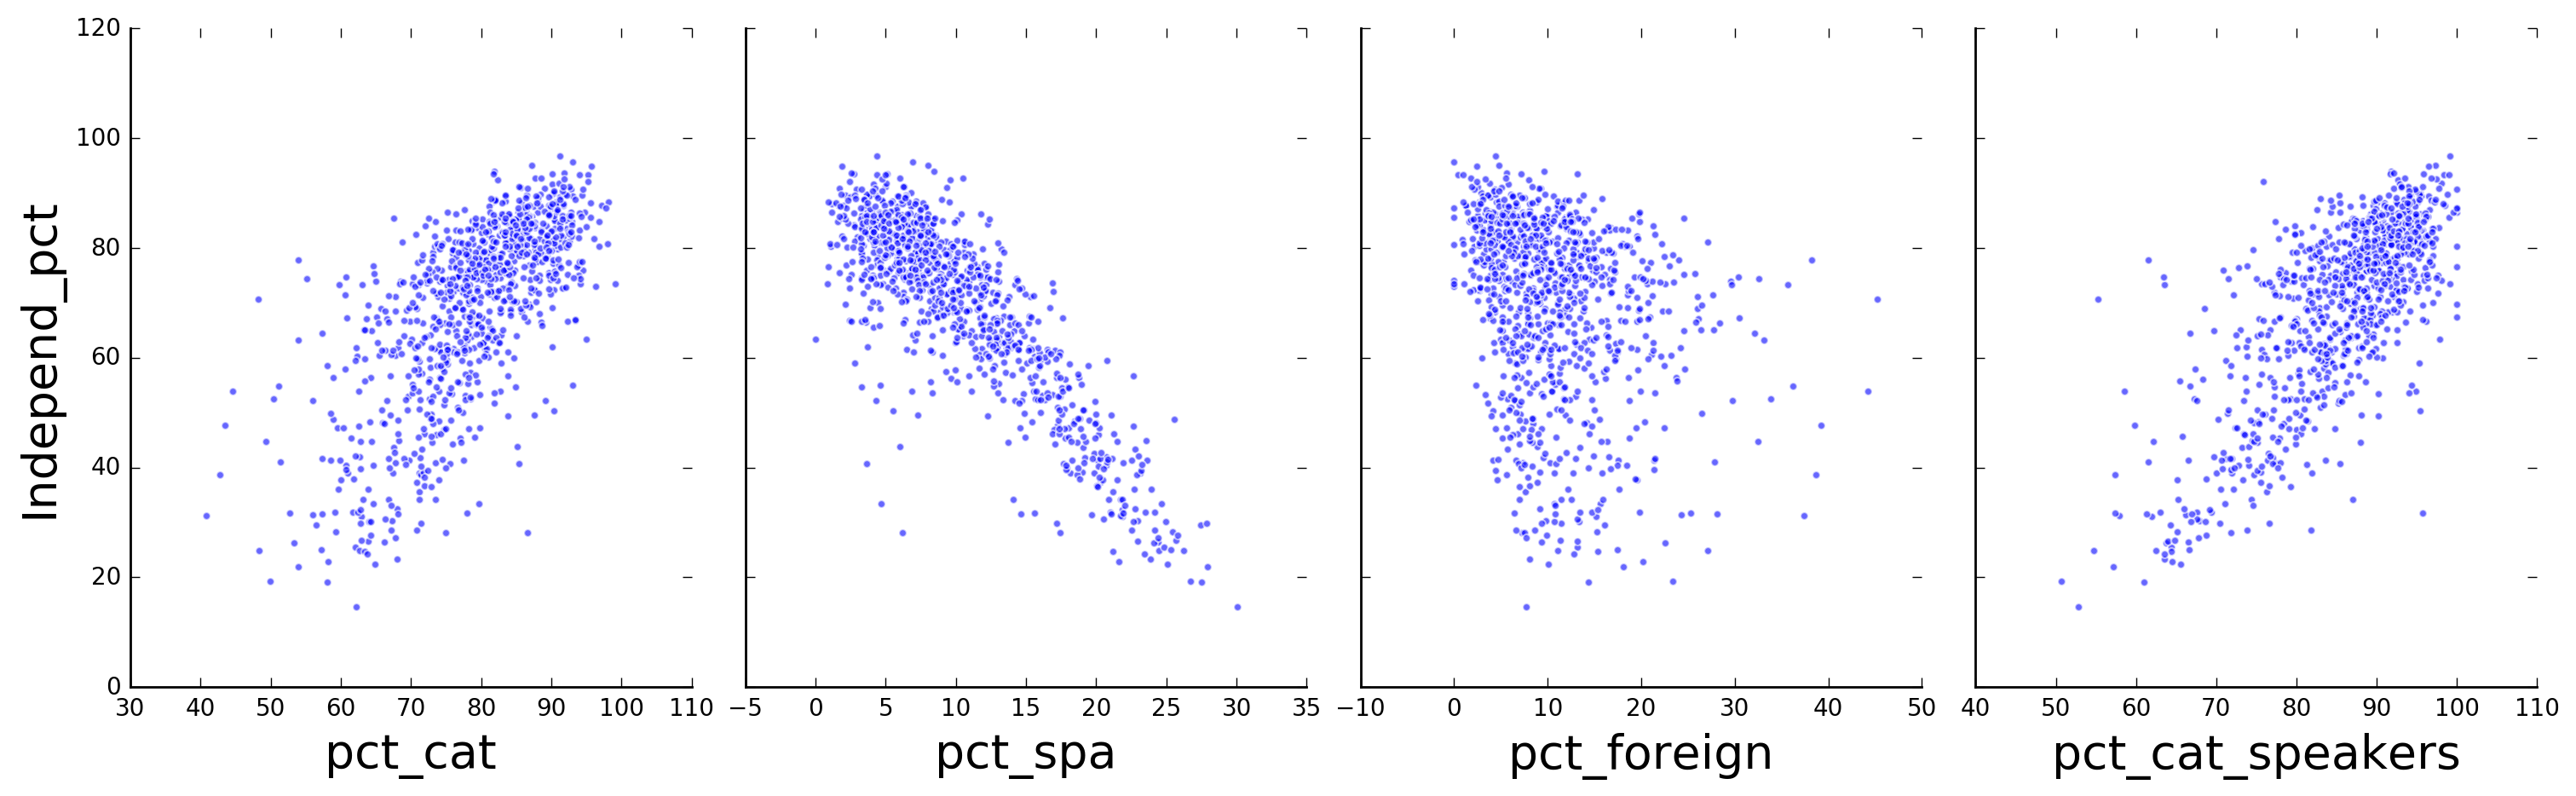

In [22]:
%matplotlib inline
plt.rcParams["axes.labelsize"] = 20
#plt.rcParams['figure.figsize'] = (80, 20)
plt.rcParams['figure.dpi'] = 200
g = sns.pairplot(DF_ALL_MUNIC_DATA, y_vars=attributes[0], x_vars=attributes[1:4] + [attributes[-2]], height=4, aspect=1.1, plot_kws=dict(s=10, alpha=0.6))
g.fig.set_size_inches(15,5)


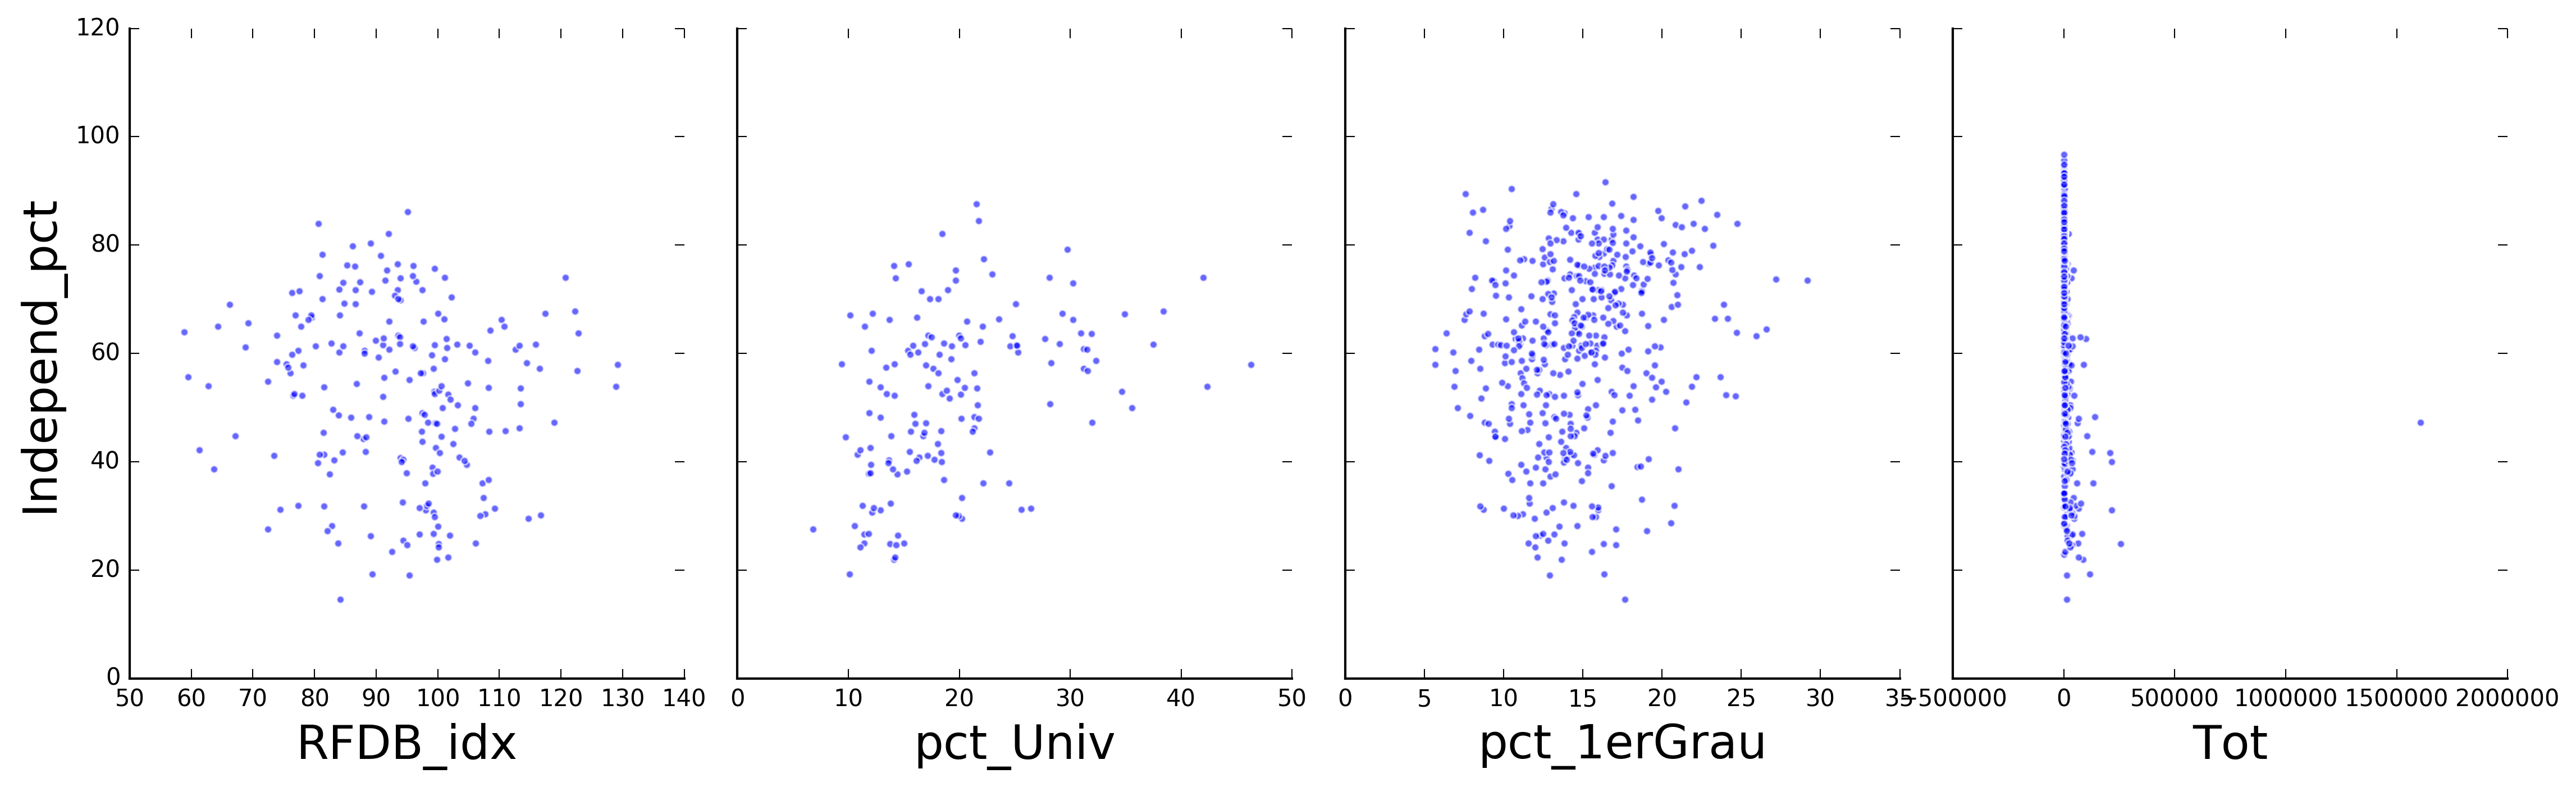

In [37]:
%matplotlib inline
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['figure.dpi'] = 300
g = sns.pairplot(DF_ALL_MUNIC_DATA, y_vars=attributes[0], x_vars=['RFDB_idx', 'pct_Univ', 'pct_1erGrau', 'Tot'], height=4,aspect=1.1, plot_kws=dict(s=10, alpha=0.6))
g.fig.set_size_inches(15, 5)

In [48]:
# import warnings
# warnings.filterwarnings('ignore')

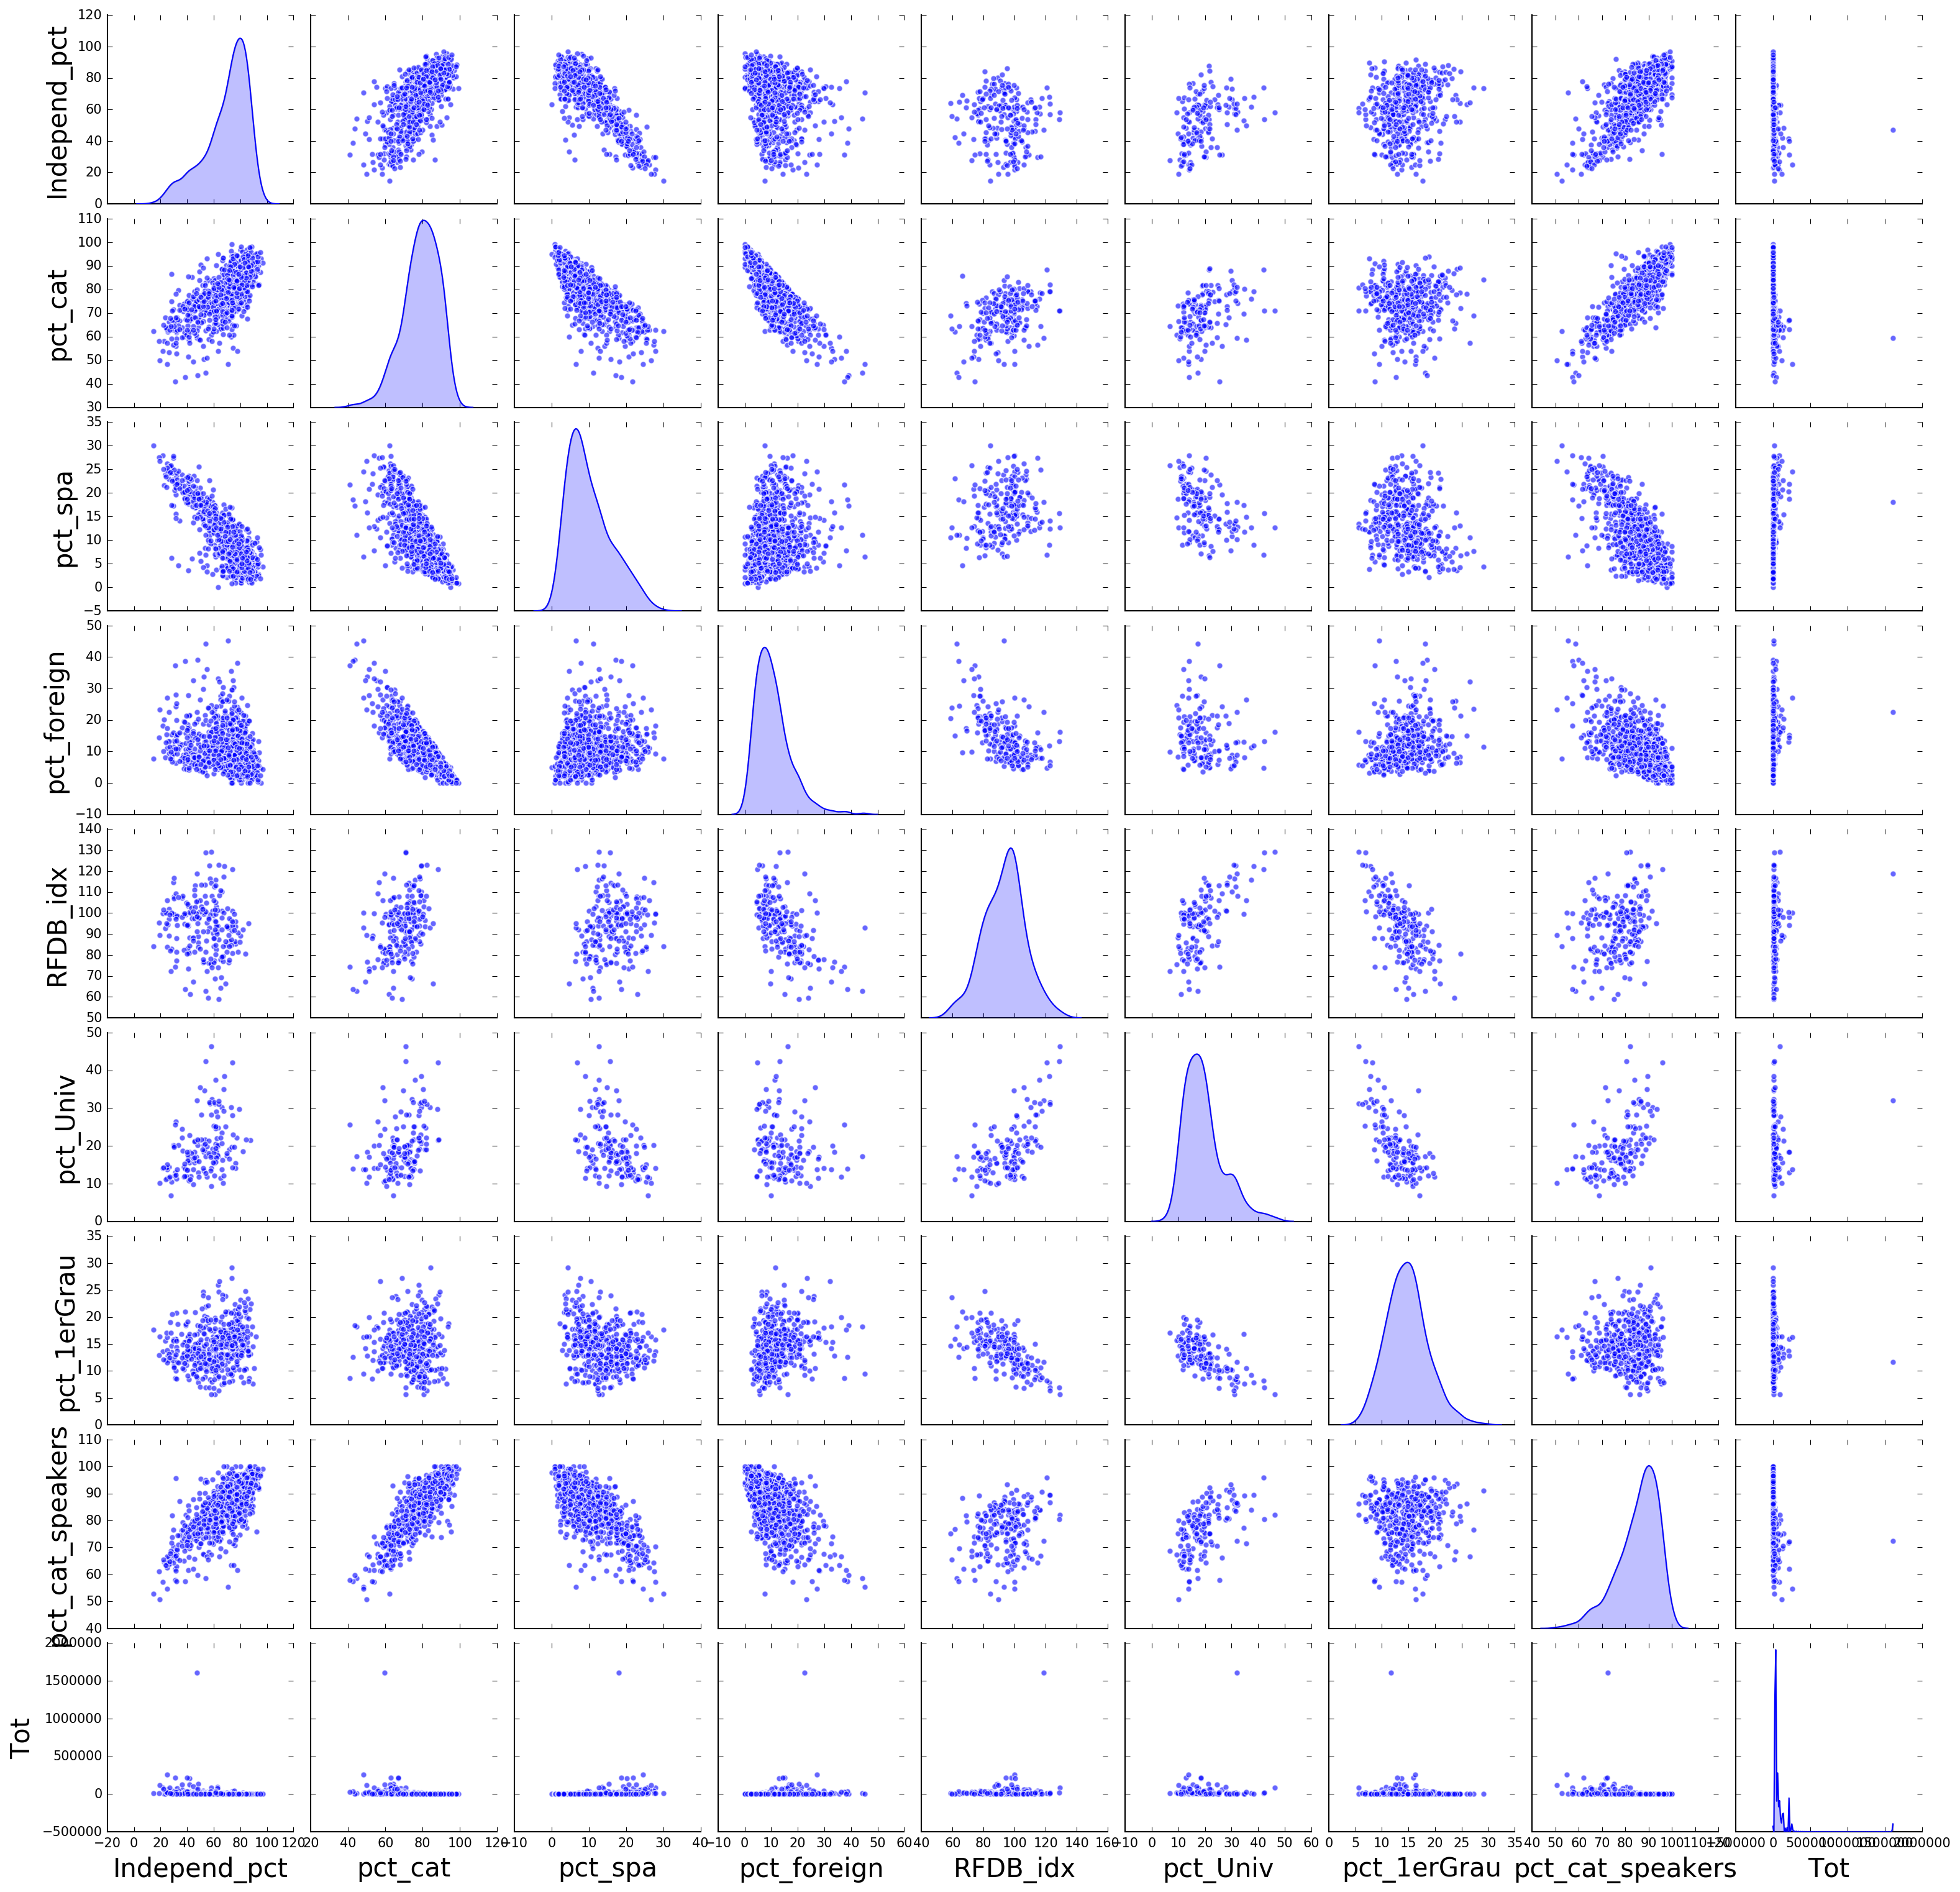

In [55]:
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['figure.dpi'] = 150
g = sns.pairplot(DF_ALL_MUNIC_DATA, vars=attributes, height=4,aspect=1.1, diag_kind='kde', plot_kws=dict(s=20, alpha=0.6))
g.fig.set_size_inches(20,20)

The plot contains a lot of information, but we essentially need to focus on the first row, where the independent variable **Independ_pct** is plotted against all the potential independent variables that we will consider. The remaining plots that allow to visualize correlations between independent variables are also important in order to assess how much independent variables are correlated between each other. For instance, we observe that **pct_cat_speakers** is strongly correlated with **pct_cat**. From a modeling viewpoint, it is therefore pointless to consider them as separate predictors. 

Interestingly, the plot also gives as a description of the distribution of each variable in the diagonal cells. In the first cell, for instance, we can realize that independence support by municipality has actually a very skewed distribution: the vast majority of municipalities show a very strong support for independence, whereas reject of it is actually clustered in a small minority of large municipalities.

Already from a quick observation

#### Feature selection : random forests

#### Regression

In [67]:
attributes

['Independ_pct',
 'pct_cat',
 'pct_spa',
 'pct_foreign',
 'RFDB_idx',
 'pct_Univ',
 'pct_1erGrau',
 'pct_cat_speakers',
 'Tot']

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
a = results.summary2()

In [92]:
a.tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.850
1,Dependent Variable:,Independ_pct,AIC:,868.9207
2,Date:,2018-09-19 17:48,BIC:,883.5206
3,No. Observations:,137,Log-Likelihood:,-429.46
4,Df Model:,4,F-statistic:,193.7
5,Df Residuals:,132,Prob (F-statistic):,3.34e-54
6,R-squared:,0.854,Scale:,32.098


In [91]:
a.tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,96.248144,3.796164,25.354056,1.415947e-52,88.738957,103.757330
pct_spa,-2.787738,0.117658,-23.693595,2.184922e-49,-3.020477,-2.554999
RFDB_idx,0.024098,0.047209,0.510458,6.105834e-01,-0.069286,0.117482
pct_Univ,-0.021025,0.098486,-0.213480,8.312823e-01,-0.215839,0.173790
Tot,-0.000003,0.000004,-0.774910,4.397789e-01,-0.000010,0.000004


In [82]:
results = smf.ols("Independ_pct ~ pct_spa + RFDB_idx + pct_Univ + Tot  ", 
                  data = DF_ALL_MUNIC_DATA).fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.850   
Dependent Variable: Independ_pct     AIC:                868.9207
Date:               2018-09-19 17:46 BIC:                883.5206
No. Observations:   137              Log-Likelihood:     -429.46 
Df Model:           4                F-statistic:        193.7   
Df Residuals:       132              Prob (F-statistic): 3.34e-54
R-squared:          0.854            Scale:              32.098  
------------------------------------------------------------------
             Coef.   Std.Err.     t      P>|t|    [0.025   0.975] 
------------------------------------------------------------------
Intercept   96.2481    3.7962   25.3541  0.0000  88.7390  103.7573
pct_spa     -2.7877    0.1177  -23.6936  0.0000  -3.0205   -2.5550
RFDB_idx     0.0241    0.0472    0.5105  0.6106  -0.0693    0.1175
pct_Univ    -0.0210    0.0985   -0.2135  0.8313  -0.2158    0.1738
Tot         -0.0000    0.0000   -0.7749  0.4398  -0.0000    0.0000
-----------------------------------------------------------------
Omnibus:             2.921        Durbin-Watson:          2.080  
Prob(Omnibus):       0.232        Jarque-Bera (JB):       2.935  
Skew:                -0.321       Prob(JB):               0.230  
Kurtosis:            2.679        Condition No.:          1157859
=================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

### $$ Independ_{pct} = \beta_0 + \beta_1 Spa_{pct} + \beta_2 RFDB\_idx + \beta_3 Univ_{pct} + \beta_4 Tot $$

$$ Independ_pct = \alpha*X+b $$

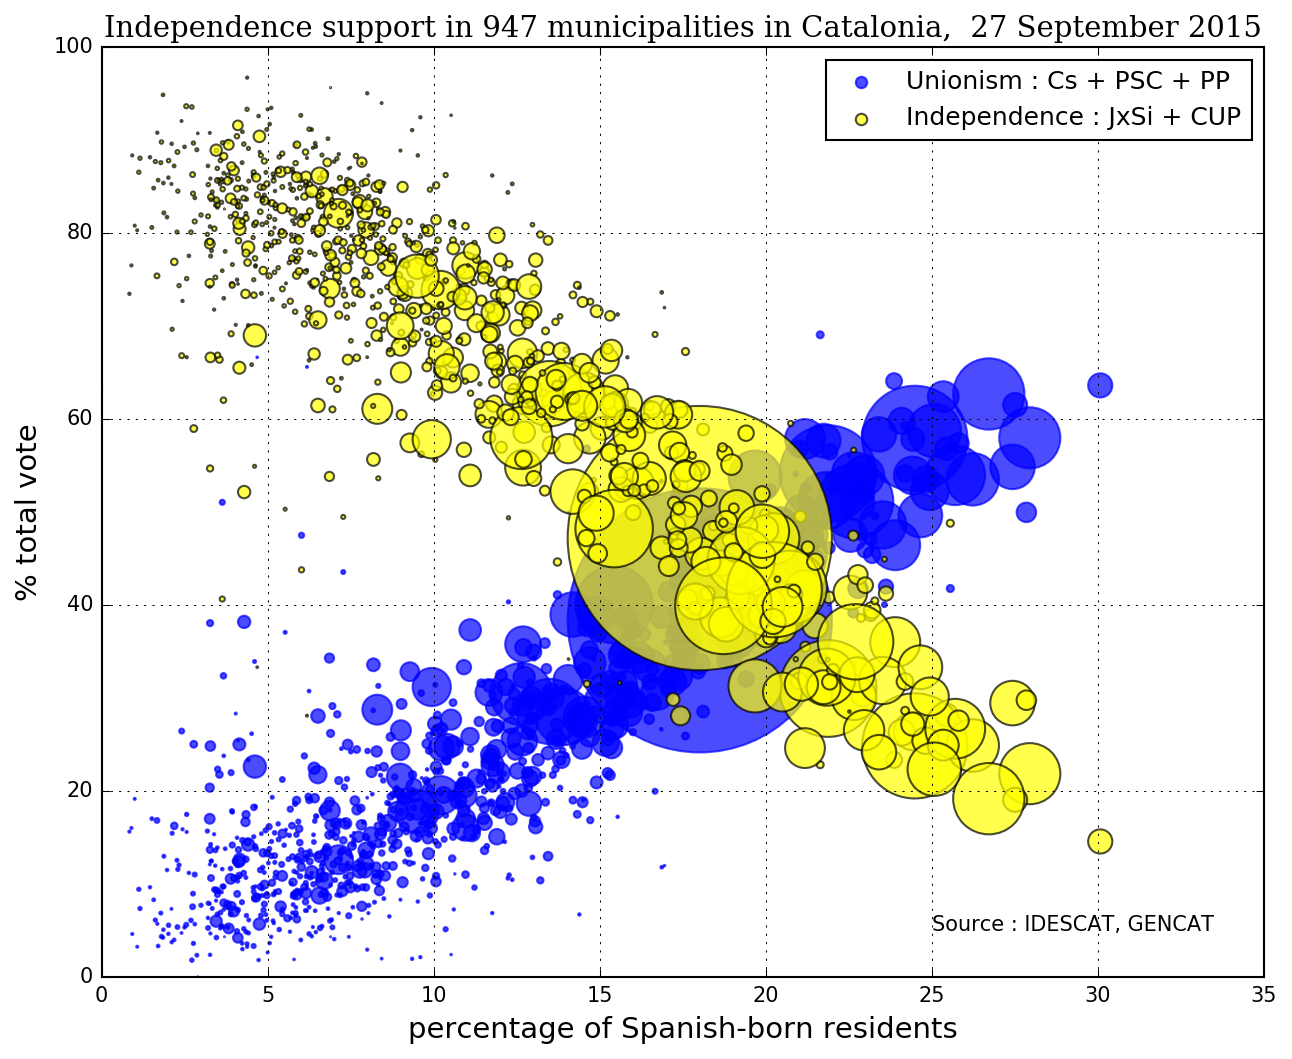

In [66]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.scatter(DF_ALL_MUNIC_DATA['pct_spa'], DF_ALL_MUNIC_DATA['Unionisme_pct'], label = 'Unionism : Cs + PSC + PP',color='blue', alpha=0.7, s= DF_ALL_MUNIC_DATA['Tot']/100)
plt.scatter(DF_ALL_MUNIC_DATA['pct_spa'], DF_ALL_MUNIC_DATA['Independ_pct'], label= "Independence : JxSi + CUP", facecolor='yellow', alpha=0.7, s= DF_ALL_MUNIC_DATA['Tot']/100)
plt.xlim(0, 35)
plt.ylim(0, 100)
plt.xlabel('percentage of Spanish-born residents', fontsize=14)
plt.ylabel('% total vote', fontsize=14)
plt.title('Independence support in 947 municipalities in Catalonia,  27 September 2015', 
          {'fontsize': 14.}, family='serif')
plt.grid('on')
plt.text(25, 5, 'Source : IDESCAT, GENCAT')
lgnd = plt.legend(loc ='best', scatterpoints=1, fontsize=12)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

#### Conclusion

 
Results should be taken with caution. We have the precedent of Ukraine, where two referendums were held almost in succession in a single year, with strikingly different results. Allegiances of some parts of society may switch rapidly

In [ ]:
import numpy as np
import pandas as pd
url = "http://www.historiaelectoral.com/percentcat.html"
tbs = pd.read_html(url)

In [ ]:
df = pd.DataFrame(tbs[1][[0,1]].values[2:-2], columns = ['elect_type', 'part_pct'])
df['part_pct'] = df['part_pct'].astype(int)

df = df.sort_values(by='part_pct')

df = df.reset_index(drop=True)

In [ ]:
df.count()

In [ ]:
import re

In [ ]:
df['elect_type'][0]

In [ ]:
df[df['elect_type'].str.contains('G.')]

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
dt_reg = DecisionTreeRegressor(max_depth=6)
rf_reg = RandomForestRegressor(max_depth=4)

In [66]:
df = DF_ALL_MUNIC_DATA[attributes]
df = df.dropna()
X = df.drop('Independ_pct', axis=1).values
y = df['Independ_pct'].values

In [67]:
dt_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [68]:
df.drop('Independ_pct', axis=1).keys()

Index(['pct_cat', 'pct_spa', 'pct_foreign', 'RFDB_idx', 'pct_Univ',
       'pct_1erGrau', 'pct_cat_speakers', 'Tot'],
      dtype='object')

In [69]:
dt_reg.feature_importances_

array([ 0.00250801,  0.81381858,  0.00500208,  0.0297963 ,  0.00849649,
        0.01833272,  0.11087233,  0.0111735 ])

In [53]:
rf_reg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
rf_reg.feature_importances_

array([ 0.00173497,  0.90802415,  0.00396083,  0.01225879,  0.00773688,
        0.0094459 ,  0.0457114 ,  0.01112708])

In [51]:
df.drop('Independ_pct', axis=1).columns

Index(['pct_cat', 'pct_spa', 'pct_foreign', 'RFDB_idx', 'pct_Univ',
       'pct_1erGrau', 'pct_cat_speakers', 'Tot'],
      dtype='object')